In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [88]:
file_path = 'validation.csv'
data = pd.read_csv(file_path)

In [89]:
data.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0591095,product_de_0301773,reviewer_de_0787123,1,Das Produkt kam bis heute nicht bei mir an. Ic...,Produkte NICHT geliefert,de,toy
1,1,de_0987834,product_de_0720578,reviewer_de_0983846,1,"Gebrauchte Spinner, teilzerlegt und teilweise ...","Gebrauchtware, ekelhaft",de,toy
2,2,de_0978206,product_de_0499114,reviewer_de_0238704,1,Bei beiden Bestellungen war jeweils eine Glühb...,Sehr schlechte Qualität,de,home
3,3,de_0407600,product_de_0648552,reviewer_de_0102048,1,Sofort zurückgeschickt,Der letzte Dreck,de,furniture
4,4,de_0453469,product_de_0900029,reviewer_de_0862313,1,wie man auf den Fotos erkennen kann ist das Gl...,"passform schlecht, Haftung schlecht - Finger weg",de,wireless


In [90]:
data.isnull().sum()

Unnamed: 0          0
review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        2
language            0
product_category    0
dtype: int64

In [91]:
data.dropna(inplace=True)

In [92]:
data.isnull().sum()

Unnamed: 0          0
review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29998 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        29998 non-null  int64 
 1   review_id         29998 non-null  object
 2   product_id        29998 non-null  object
 3   reviewer_id       29998 non-null  object
 4   stars             29998 non-null  int64 
 5   review_body       29998 non-null  object
 6   review_title      29998 non-null  object
 7   language          29998 non-null  object
 8   product_category  29998 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.3+ MB


In [94]:
data.describe()

,Unnamed: 0,stars
count,29998.000000,29998.00000
mean,15000.147510,3.00000
std,8660.242048,1.41419
min,0.000000,1.00000
25%,7500.250000,2.00000
50%,15000.500000,3.00000
75%,22499.750000,4.00000
max,29999.000000,5.00000


In [95]:
data['stars'].value_counts()

stars
2    6000
4    6000
3    6000
1    5999
5    5999
Name: count, dtype: int64

C:\Users\Sandeep Bandi\AppData\Local\Temp\ipykernel_8060\1563486297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['stars'], palette='viridis')


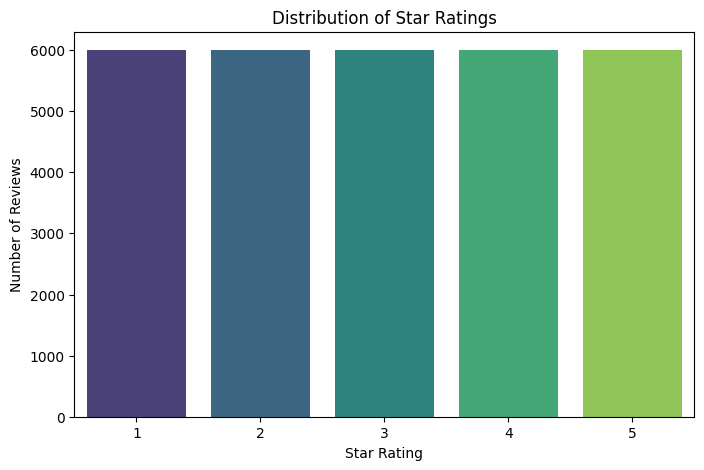

In [96]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['stars'], palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [97]:
category_distribution = data['product_category'].value_counts().head(10)

C:\Users\Sandeep Bandi\AppData\Local\Temp\ipykernel_8060\1477365014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.values, y=category_distribution.index, palette='coolwarm')


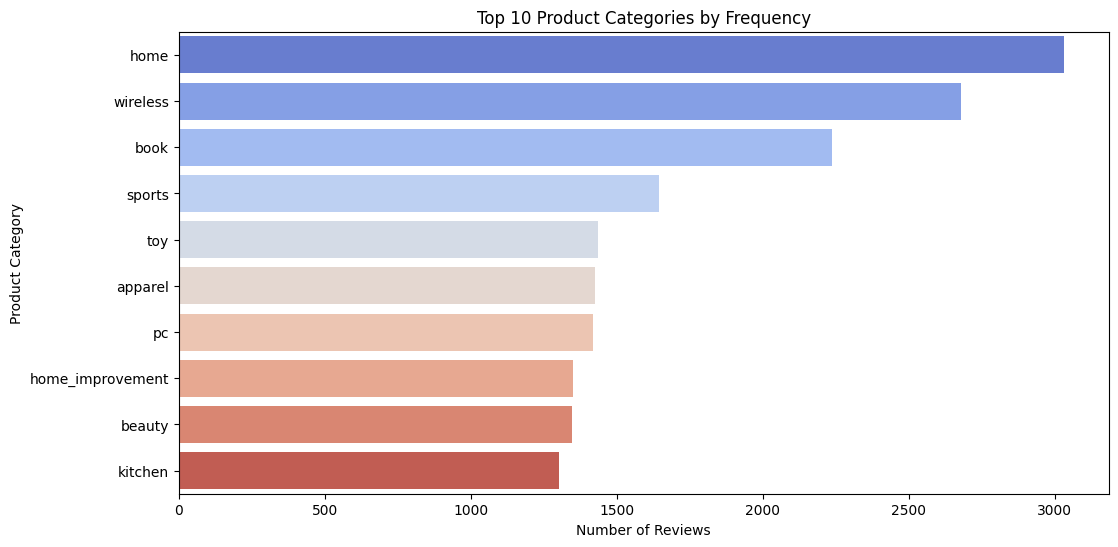

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.values, y=category_distribution.index, palette='coolwarm')
plt.title('Top 10 Product Categories by Frequency')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Category')
plt.show()

In [99]:
data['language'].value_counts()

language
fr    5000
es    5000
ja    5000
zh    5000
en    4999
de    4999
Name: count, dtype: int64

In [100]:
data.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0591095,product_de_0301773,reviewer_de_0787123,1,Das Produkt kam bis heute nicht bei mir an. Ic...,Produkte NICHT geliefert,de,toy
1,1,de_0987834,product_de_0720578,reviewer_de_0983846,1,"Gebrauchte Spinner, teilzerlegt und teilweise ...","Gebrauchtware, ekelhaft",de,toy
2,2,de_0978206,product_de_0499114,reviewer_de_0238704,1,Bei beiden Bestellungen war jeweils eine Glühb...,Sehr schlechte Qualität,de,home
3,3,de_0407600,product_de_0648552,reviewer_de_0102048,1,Sofort zurückgeschickt,Der letzte Dreck,de,furniture
4,4,de_0453469,product_de_0900029,reviewer_de_0862313,1,wie man auf den Fotos erkennen kann ist das Gl...,"passform schlecht, Haftung schlecht - Finger weg",de,wireless


In [101]:
#FE
def preprocess_text(text):
    if not isinstance(text, str):
        return ""  # Convert non-string values to an empty string
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text


In [102]:
data['review_body'] = data['review_body'].apply(preprocess_text)
data['review_title'] = data['review_title'].apply(preprocess_text)

In [103]:
data.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,de_0591095,product_de_0301773,reviewer_de_0787123,1,das produkt kam bis heute nicht bei mir an ich...,produkte nicht geliefert,de,toy
1,1,de_0987834,product_de_0720578,reviewer_de_0983846,1,gebrauchte spinner teilzerlegt und teilweise m...,gebrauchtware ekelhaft,de,toy
2,2,de_0978206,product_de_0499114,reviewer_de_0238704,1,bei beiden bestellungen war jeweils eine glhbi...,sehr schlechte qualitt,de,home
3,3,de_0407600,product_de_0648552,reviewer_de_0102048,1,sofort zurckgeschickt,der letzte dreck,de,furniture
4,4,de_0453469,product_de_0900029,reviewer_de_0862313,1,wie man auf den fotos erkennen kann ist das gl...,passform schlecht haftung schlecht finger weg,de,wireless


In [104]:

data['combined_text'] = data['review_title'] + " " + data['review_body']

In [105]:
data.head()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,combined_text
0,0,de_0591095,product_de_0301773,reviewer_de_0787123,1,das produkt kam bis heute nicht bei mir an ich...,produkte nicht geliefert,de,toy,produkte nicht geliefert das produkt kam bis h...
1,1,de_0987834,product_de_0720578,reviewer_de_0983846,1,gebrauchte spinner teilzerlegt und teilweise m...,gebrauchtware ekelhaft,de,toy,gebrauchtware ekelhaft gebrauchte spinner teil...
2,2,de_0978206,product_de_0499114,reviewer_de_0238704,1,bei beiden bestellungen war jeweils eine glhbi...,sehr schlechte qualitt,de,home,sehr schlechte qualitt bei beiden bestellungen...
3,3,de_0407600,product_de_0648552,reviewer_de_0102048,1,sofort zurckgeschickt,der letzte dreck,de,furniture,der letzte dreck sofort zurckgeschickt
4,4,de_0453469,product_de_0900029,reviewer_de_0862313,1,wie man auf den fotos erkennen kann ist das gl...,passform schlecht haftung schlecht finger weg,de,wireless,passform schlecht haftung schlecht finger weg...


In [106]:
#text to vectors

vectorizer = TfidfVectorizer(max_features=20000)
X = vectorizer.fit_transform(data['combined_text'])
y = data['stars']

In [107]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
X.shape,X_train.shape,X_test.shape

((29998, 20000), (23998, 20000), (6000, 20000))

In [109]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

s:\PROJECTS-main\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
# Evaluation
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.401
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.43      0.50      1212
           2       0.37      0.27      0.31      1165
           3       0.40      0.27      0.32      1221
           4       0.42      0.28      0.34      1169
           5       0.34      0.75      0.47      1233

    accuracy                           0.40      6000
   macro avg       0.42      0.40      0.39      6000
weighted avg       0.42      0.40      0.39      6000



In [111]:
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 100649 stored elements and shape (6000, 20000)>

In [112]:
# Test the prediction on a few samples from the test set
sample_reviews = X_test[:5]  # Taking the first 5 samples from the test set
sample_predictions = model.predict(sample_reviews)

# Display the predictions and the corresponding actual star ratings
sample_actual = y_test[:5].tolist()
sample_predictions = sample_predictions.tolist()

# Combine and print the results for easier comparison
for i, (pred, actual) in enumerate(zip(sample_predictions, sample_actual)):
    print(f"Review {i+1}: Predicted Stars = {pred}, Actual Stars = {actual}")


Review 1: Predicted Stars = 2, Actual Stars = 3
Review 2: Predicted Stars = 5, Actual Stars = 3
Review 3: Predicted Stars = 5, Actual Stars = 4
Review 4: Predicted Stars = 5, Actual Stars = 1
Review 5: Predicted Stars = 4, Actual Stars = 3


#Recommend system for product_id

In [ ]:
#cosine similarity to recommend
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(max_features=20000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined_text'])

# 3. Calculate Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [62]:
def recommend(product_id):
    index = data[data['product_id']==product_id].index[0]
    distances = sorted(list(enumerate(cosine_sim[index])),reverse=True, key= lambda x : x[1])  #key will take sililarity 
    for i in distances[1:6]: #top five movies
        print(data.iloc[i[0]].product_id)

In [ ]:
# Get recommendations for a specific product
product_id = 'product_de_0301773'  # Example product ID
print("Recommendations for product:", product_id)
recommendations = recommend(product_id)

Recommendations for product: product_de_0301773
product_de_0759423
product_de_0932296
product_de_0454602
product_de_0417252
product_de_0182454
